In [114]:
import os
import cv2
import pandas as pd
import matplotlib.pyplot as plt

img_path = os.path.join("./obj_train_data/frame_000000.jpg")
txt_path = os.path.join("./obj_train_data/frame_000000.txt")

HEADER = ["label", "x", "y", "w", "h"]

img = cv2.imread(img_path, cv2.IMREAD_COLOR)
txt = pd.read_csv(txt_path, delimiter=" ", header=None, names=HEADER)
txt = txt.query('label in [0, 1]')
txt

,label,x,y,w,h
0,0,0.460785,0.435701,0.014555,0.040069
1,0,0.813634,0.459493,0.020648,0.045912
2,0,0.969525,0.388539,0.019721,0.035894
3,0,0.991570,0.546720,0.016859,0.048412
4,1,0.962951,0.574269,0.009391,0.021694


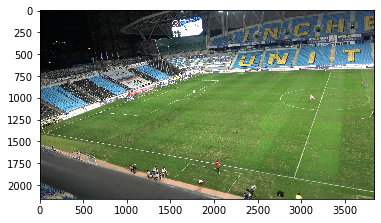

In [115]:
IMG_WIDTH  = img.shape[1]
IMG_HEIGHT = img.shape[0]

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# plt.figure(figsize=(20, 10))
plt.imshow(rgb)
plt.show()

In [117]:
cvt_txt = pd.DataFrame()

cvt_txt['x'] = txt.x * IMG_WIDTH
cvt_txt['y'] = txt.y * IMG_HEIGHT
cvt_txt['w'] = txt.w * IMG_WIDTH
cvt_txt['h'] = txt.h * IMG_HEIGHT

cvt_txt = cvt_txt[['x', 'y', 'w', 'h']].applymap(int)
cvt_txt

,x,y,w,h
0,1769,941,55,86
1,3124,992,79,99
2,3722,839,75,77
3,3807,1180,64,104
4,3697,1240,36,46


In [120]:
from scipy.spatial.distance import cdist

center_mat = cvt_txt[['x', 'y']]

dist_mat = cdist(center_mat, center_mat)
dist_mat = pd.DataFrame(dist_mat)
dist_mat

,0,1,2,3,4
0,0.000000,1355.959439,1955.661781,2051.966130,1951.047155
1,1355.959439,0.000000,617.262505,708.401722,624.366079
2,1955.661781,617.262505,0.000000,351.434204,401.778546
3,2051.966130,708.401722,351.434204,0.000000,125.299641
4,1951.047155,624.366079,401.778546,125.299641,0.000000


In [122]:
dist_mat < (412 / 2)

,0,1,2,3,4
0,True,False,False,False,False
1,False,True,False,False,False
2,False,False,True,False,False
3,False,False,False,True,True
4,False,False,False,True,True


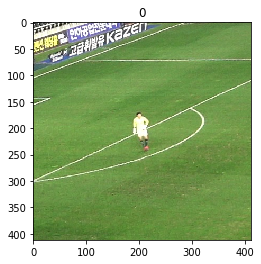

[0.5, 0.5, 0.13349514563106796, 0.2087378640776699]


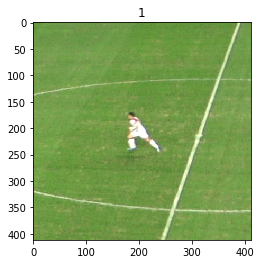

[0.5, 0.5, 0.19174757281553398, 0.24029126213592233]


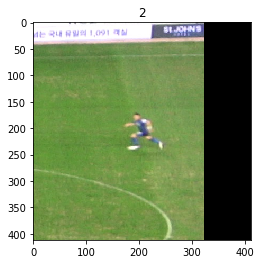

[0.5, 0.5, 0.1820388349514563, 0.18689320388349515]


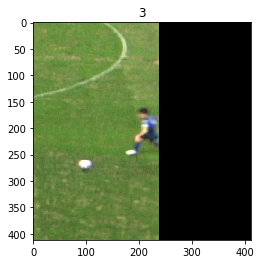

[0.5, 0.5, 0.1553398058252427, 0.2524271844660194]


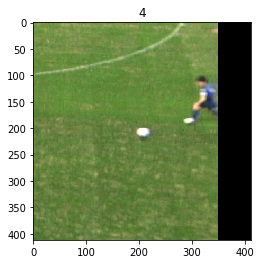

[0.5, 0.5, 0.08737864077669903, 0.11165048543689321]


In [136]:
CROP_SIZE = 206

img_ = img.copy()

for i in range(5):
    try:
        half_w = int(cvt_txt.iloc[i].w / 2)
        half_h = int(cvt_txt.iloc[i].h / 2)

#         img_ = cv2.rectangle(img_, 
#                              (cvt_txt.loc[i].x - half_w, cvt_txt.loc[i].y - half_h), 
#                              (cvt_txt.loc[i].x + half_w, cvt_txt.loc[i].y + half_h),
#                              (255, 0, 0), 3)
        
        crop_img = img_[cvt_txt.loc[i].y - CROP_SIZE:cvt_txt.loc[i].y + CROP_SIZE,
                        cvt_txt.loc[i].x - CROP_SIZE:cvt_txt.loc[i].x + CROP_SIZE]
        
        if crop_img.shape[0] < (CROP_SIZE * 2):
            crop_img = np.pad(crop_img, ((0, (CROP_SIZE * 2) - crop_img.shape[0]), (0, 0), (0, 0)), 'constant', constant_values=(0))
        
        if crop_img.shape[1] < (CROP_SIZE * 2):
            crop_img = np.pad(crop_img, ((0, 0), (0, (CROP_SIZE * 2) - crop_img.shape[1]), (0, 0)), 'constant', constant_values=(0))
        
        rgb = cv2.cvtColor(crop_img, cv2.COLOR_BGR2RGB)
        plt.imshow(rgb)
        plt.title(str(i))
        plt.show()
        
        print([CROP_SIZE / (CROP_SIZE * 2),
               CROP_SIZE / (CROP_SIZE * 2),
               cvt_txt.loc[i].w / (CROP_SIZE * 2),
               cvt_txt.loc[i].h / (CROP_SIZE * 2),
              ])
        
    except:
        print(f"ERROR: {str(i)}")